In [24]:
import numpy as np
import pandas as pd
from scipy.io import arff
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder


Importar data

In [25]:
data_arroz = arff.loadarff('../data/raw/Rice_Cammeo_Osmancik.arff')
df = pd.DataFrame(data_arroz[0])
print(df)

         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

      Convex_Area    Extent

Limpieza de datos

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


In [27]:
# Verificar los valores únicos en la columna 'Class'
print("Valores únicos antes de la limpieza:")
print(df['Class'].unique())

Valores únicos antes de la limpieza:
[b'Cammeo' b'Osmancik']


In [28]:
# Convertir los valores de bytes a strings y eliminar espacios en blanco
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8').strip())

In [29]:
# Convertir la columna 'Class' al tipo categórico
df['Class'] = df['Class'].astype('category')

In [30]:
# Verificar los valores únicos en la columna 'Class' después de la limpieza
print("Valores únicos después de la limpieza:")
print(df['Class'].unique())

Valores únicos después de la limpieza:
['Cammeo', 'Osmancik']
Categories (2, object): ['Cammeo', 'Osmancik']


In [31]:
# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0      15617.0  0.572896  Cammeo  
1      15072.0  0.615436  Cammeo  
2      14954.0  0.693259  Cammeo  
3      13368.0  0.640669  Cammeo  
4      15262.0  0.646024  Cammeo  


In [32]:
# Mostrar la información del DataFrame para verificar los tipos de datos
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Area               3810 non-null   float64 
 1   Perimeter          3810 non-null   float64 
 2   Major_Axis_Length  3810 non-null   float64 
 3   Minor_Axis_Length  3810 non-null   float64 
 4   Eccentricity       3810 non-null   float64 
 5   Convex_Area        3810 non-null   float64 
 6   Extent             3810 non-null   float64 
 7   Class              3810 non-null   category
dtypes: category(1), float64(7)
memory usage: 212.3 KB
None


# Convertir datos categoricos a numericos

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df["Class"])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 223.4 KB


In [35]:
df["Class"].value_counts()

Class
1    2180
0    1630
Name: count, dtype: int64

# Guardar el DataFrame procesado en un archivo CSV


In [36]:

df.to_csv('../data/processed/Ricedataprocesada.csv', index=False)

In [37]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,0
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,0
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,0
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,0
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,1
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,1
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,1
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 223.4 KB


In [39]:
df.describe

<bound method NDFrame.describe of          Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.8256

# Visualizaciones

In [40]:
#Total filas y columnas 
df.shape

(3810, 8)

In [41]:
#Estadistica descriptiva
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


In [42]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
Area,3810.000000,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.000000,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.000000,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.000000,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.000000,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.000000,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.000000,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050
Class,3810.000000,0.572178,0.494828,0.000000,0.000000,1.000000,1.000000,1.000000


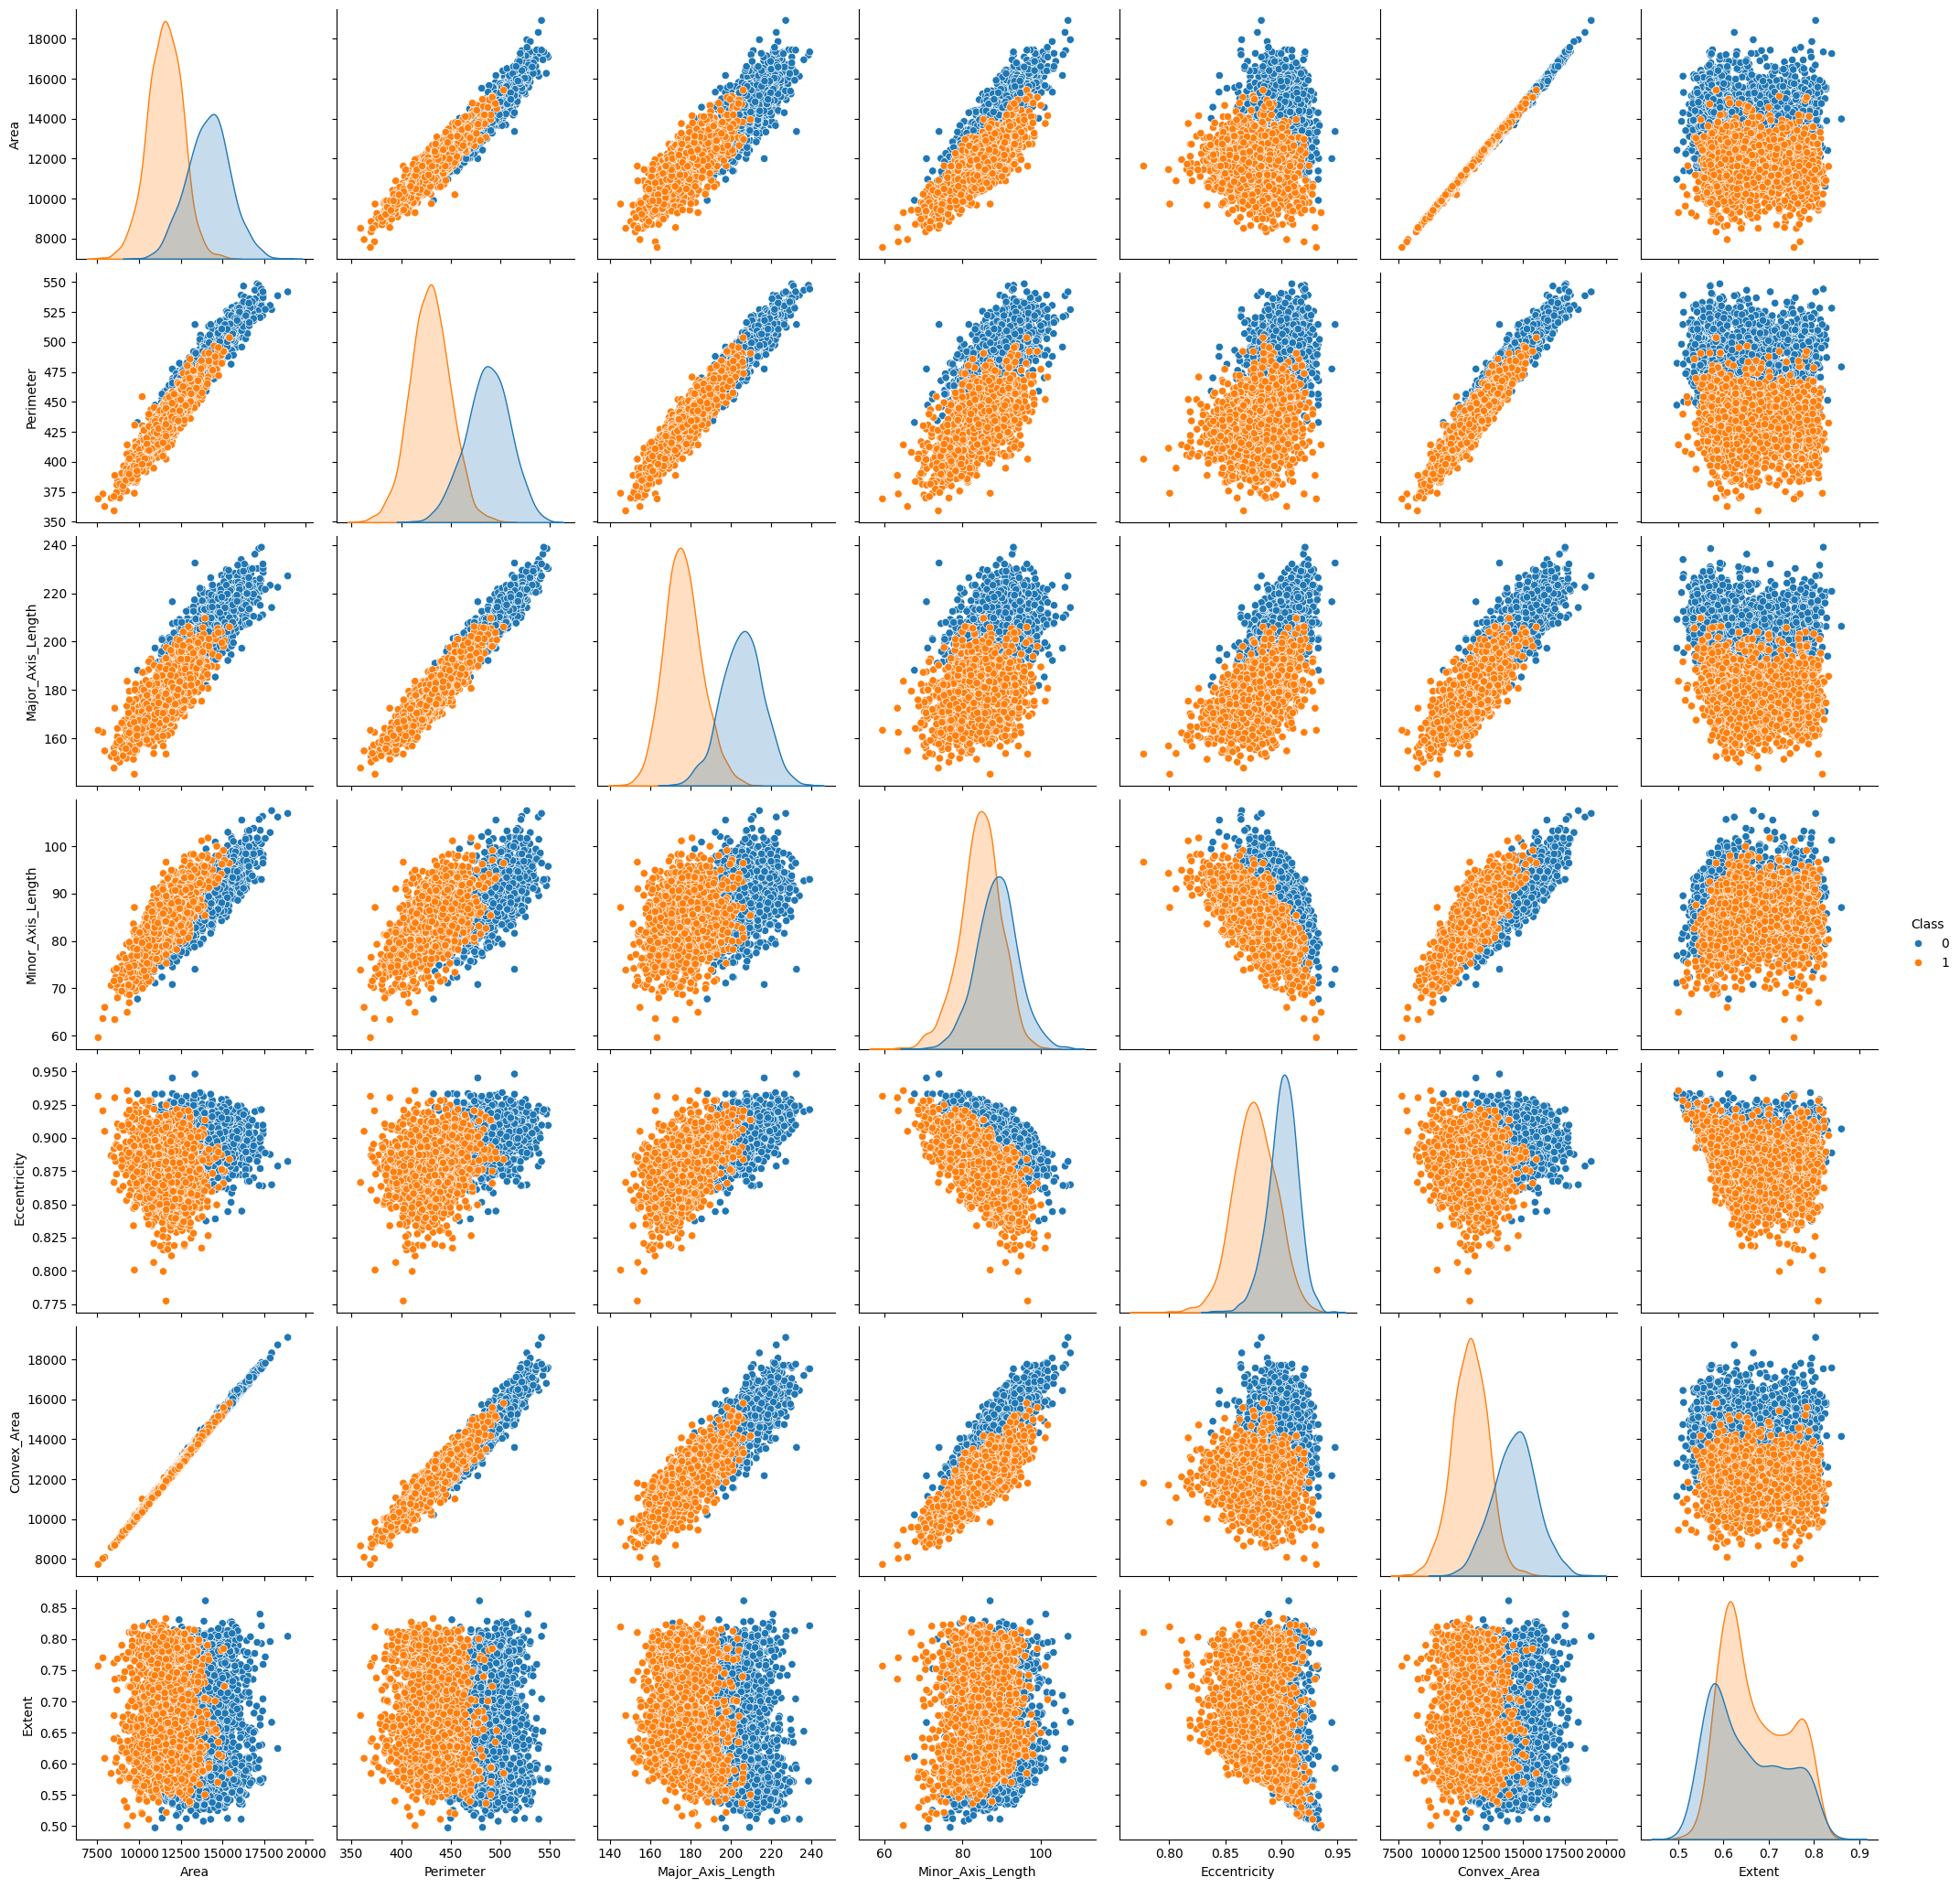

In [50]:
sns.pairplot(df, hue="Class", height=3)

plt.show()

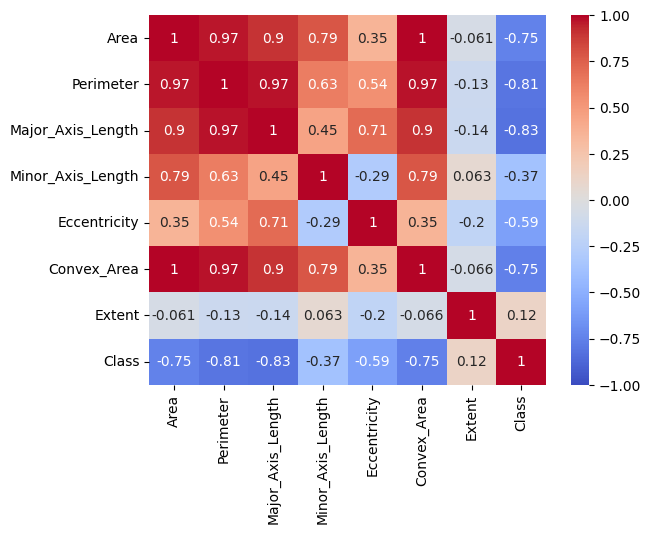

In [44]:
corr_mat = df.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1);

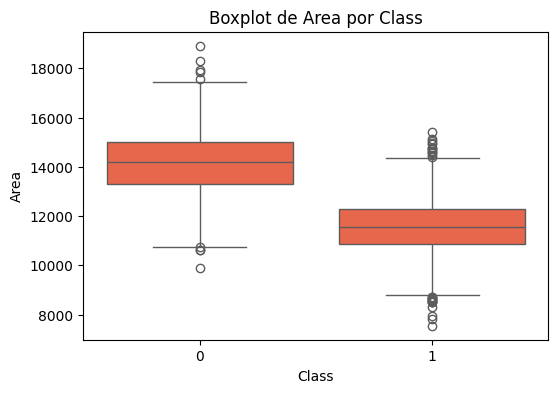

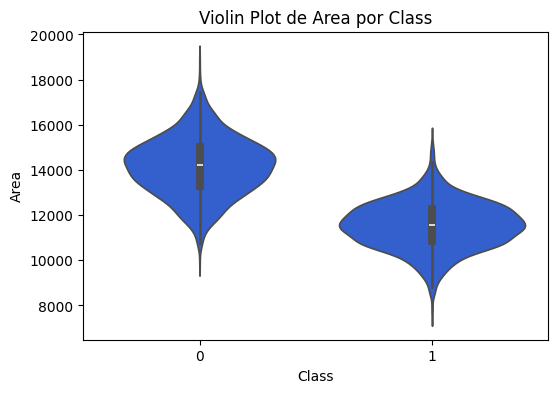

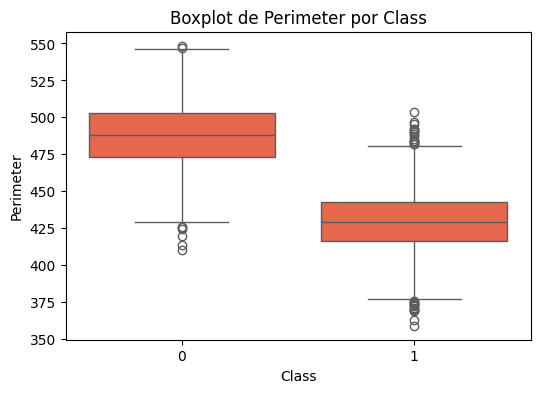

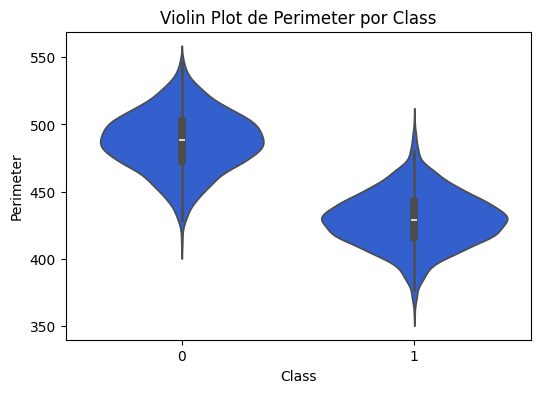

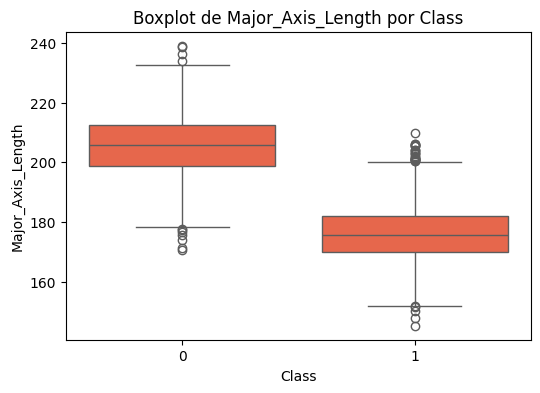

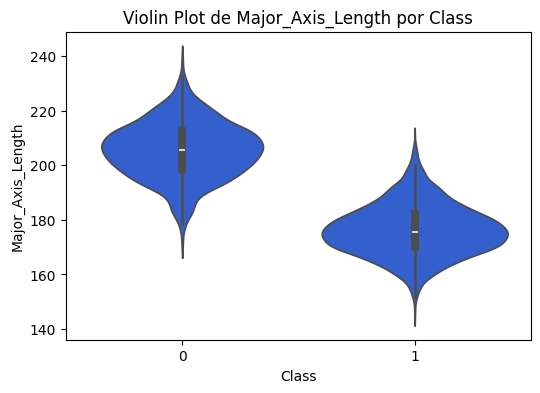

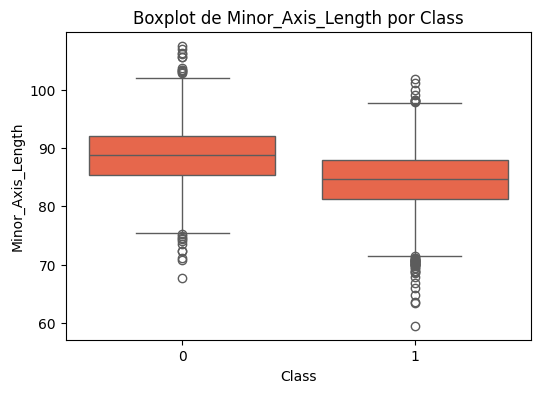

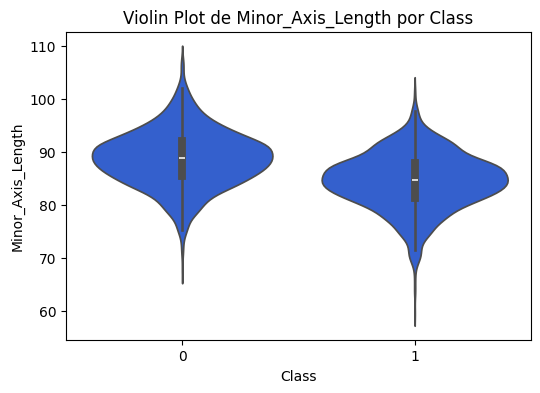

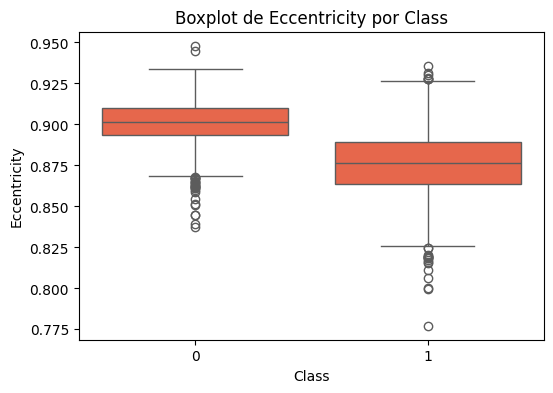

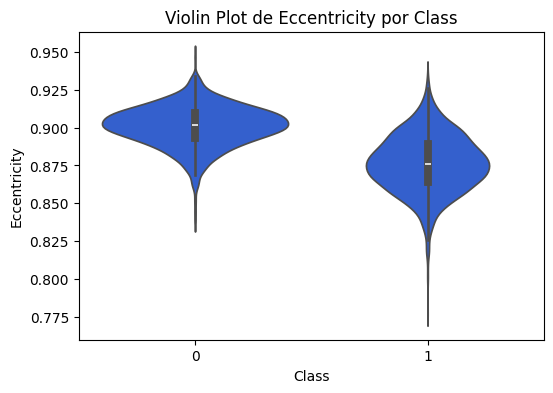

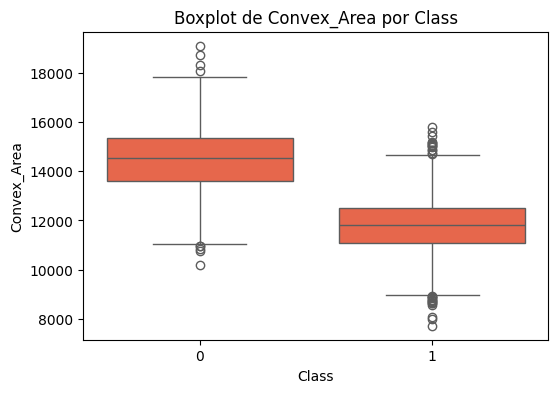

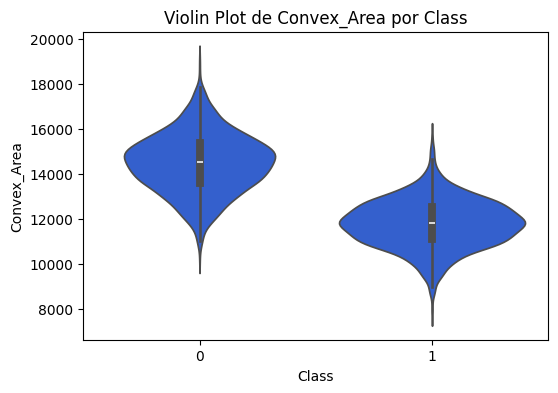

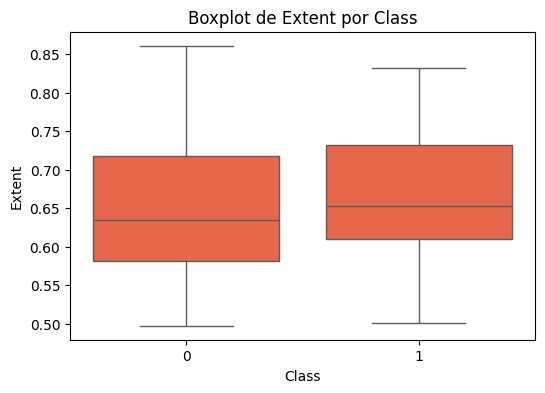

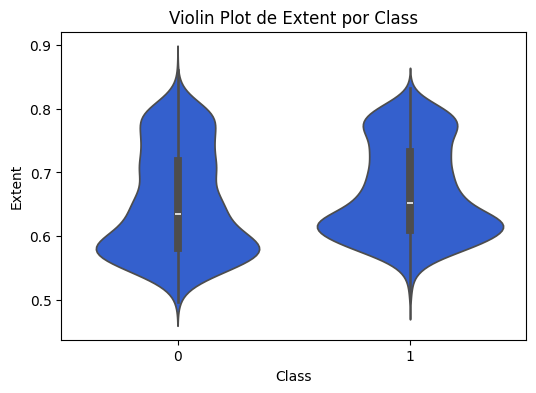

In [45]:
for column in df.drop(columns='Class').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=column, data=df, color="#ff5733")
    plt.title(f'Boxplot de {column} por Class')
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Class', y=column, data=df, color="#1b55e6")
    plt.title(f'Violin Plot de {column} por Class')
    plt.show()